In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append(os.path.abspath('../'))

import warnings
warnings.filterwarnings("ignore")

from server2022.src.train_val import *
from server2022.src.model_features import *
from server2022.data.processed.prepare_data import *


OUTPUT_FILE = '../reports/1_year_30_days.csv'

TARGET_DICT = {'1': 'binary_target', '2': 'target_more30days', '3': 'target_more90days'}
'''Choose target: 
    1 - binary_target
    2 - target_more30days
    3 - target_more90days
'''
TARGET_COL = TARGET_DICT['2'] # TARGET_DICT[input()]

In [2]:
# for 30_days {'depth': 4.0, 'l2_leaf_reg': 8.836237522928192, 'learning_rate': 0.019172380484543887}

model = CatBoostClassifier(iterations=500,
                               depth=4, 
                               l2_leaf_reg=8.8, 
                               learning_rate=0.0192, # 0.01433
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, 0.1], #0.0006
                               random_seed=RANDOM_STATE,
                              )

## No features

In [3]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [4]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x000001B56048BE50> with threshold = 0.01469...


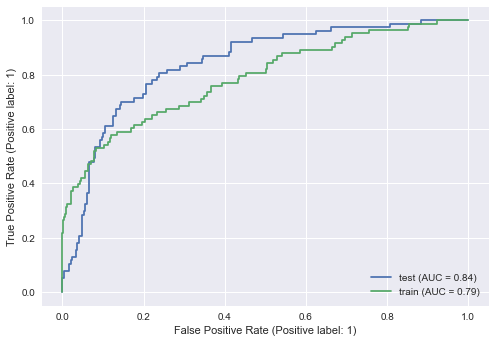

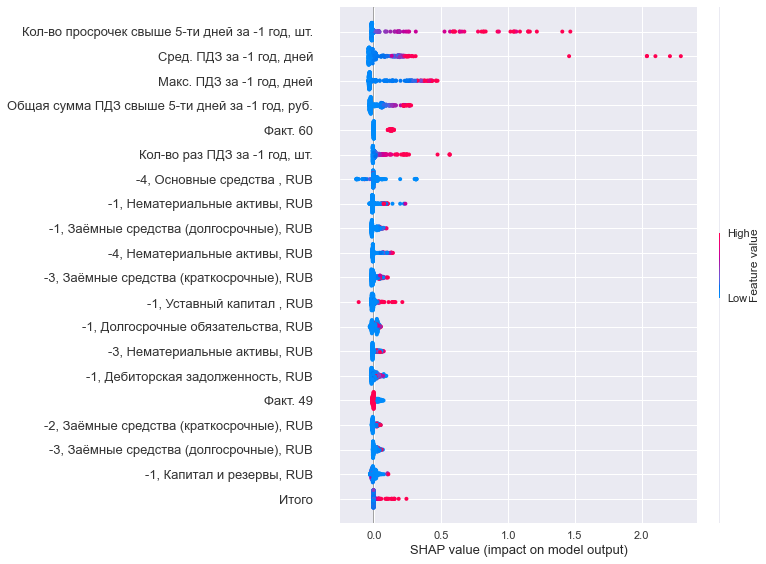


TRAIN: F1 = 0.409, Precision = 0.291, Recall = 0.687, Accuracy = 0.689, ROC_AUC = 0.789
TEST: F1 = 0.554, Precision = 0.406, Recall = 0.87, Accuracy = 0.668, ROC_AUC = 0.841



In [5]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='no_features')

## drop_zeros=True

In [7]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=True)

AssertionError: 

In [ ]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

In [ ]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='drop_zeros=True')

## use_diff_features=True

In [ ]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [ ]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)

In [ ]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='use_diff_features=True')

## use_ratio_features=True

In [ ]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [ ]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=True)

In [ ]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='use_ratio_features=True')

## add_growth=True

In [ ]:
df = create_df_1year_known(add_growth=True, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [ ]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

In [ ]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='add_growth=True')

## count_log_fin_vals=True

In [ ]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=True, normalize_fin_columns=False, drop_zeros=False)

In [ ]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

In [ ]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='count_log_fin_vals=True')

## normalize_fin_columns=True

In [ ]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=True, drop_zeros=False)

In [ ]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

In [ ]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='normalize_fin_columns=True')

## All features

In [2]:
df = create_df_1year_known()

In [3]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000001AE1AB1C430> with threshold = 0.20448...


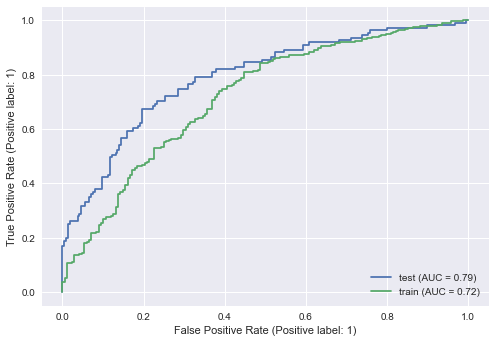

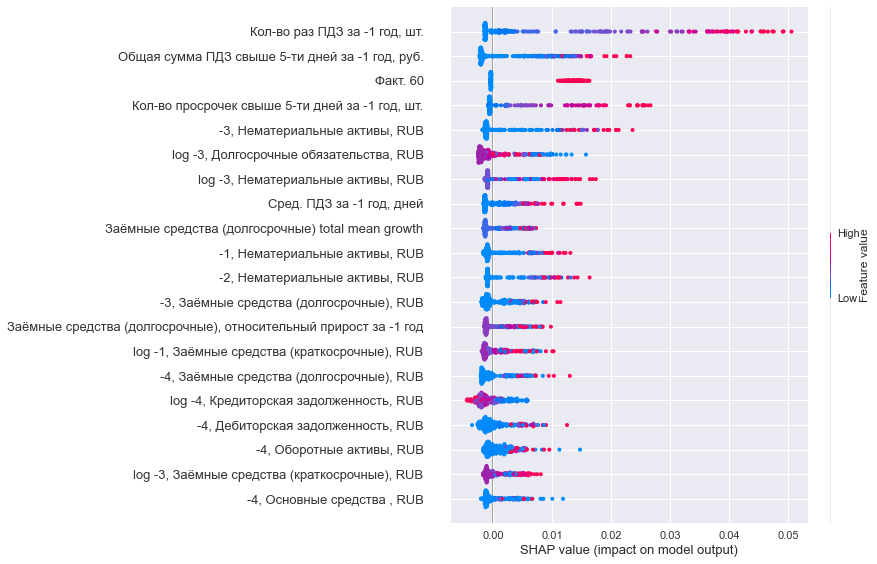


TRAIN: F1 = 0.547, Precision = 0.845, Recall = 0.405, Accuracy = 0.542, ROC_AUC = 0.718
TEST: F1 = 0.646, Precision = 0.559, Recall = 0.766, Accuracy = 0.714, ROC_AUC = 0.79



In [6]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment='All features')